In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("data/rice_wheat_corn_prices.csv")

# display original data
data.describe()

,Year,Price_wheat_ton,Price_rice_ton,Price_corn_ton,Inflation_rate,Price_wheat_ton_infl,Price_rice_ton_infl,Price_corn_ton_infl
count,360.000000,359.000000,360.000000,360.000000,359.000000,359.000000,359.000000,359.000000
mean,2006.583333,185.302869,364.105611,155.502750,36.316685,241.726769,474.038384,201.211086
std,8.671906,64.985279,131.367591,62.611439,26.605378,65.234300,133.776144,61.727752
min,1992.000000,85.300000,163.750000,75.270000,-1.290000,136.220000,246.020000,116.280000
25%,1999.000000,137.315000,261.625000,104.192500,12.370000,193.010000,397.500000,159.015000
50%,2007.000000,175.270000,344.675000,149.745000,28.300000,228.310000,455.540000,186.020000
75%,2014.000000,220.260000,444.250000,176.652500,59.700000,275.835000,540.180000,220.940000
max,2022.000000,419.610000,907.000000,333.050000,89.590000,518.470000,1120.690000,385.910000


Year                    0
Month                   0
Price_wheat_ton         0
Price_rice_ton          0
Price_corn_ton          0
Inflation_rate          0
Price_wheat_ton_infl    0
Price_rice_ton_infl     0
Price_corn_ton_infl     0
dtype: int64


<AxesSubplot:>

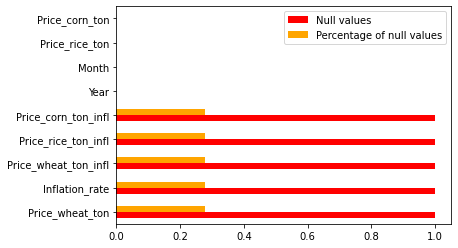

In [3]:
#find how many rows and columns have null values and get the percentage
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) * 100
empties = pd.concat([total, percent], axis=1, keys=['Null values', 'Percentage of null values'])


# drop the rows with no values for Price_wheat_ton
data.drop(data.loc[data["Price_wheat_ton"].isnull()].index, inplace=True)
print(data.isnull().sum())


# get the years in the dataset and number of months per year
years = data["Year"]

# print(years.value_counts())
empties.plot.barh(color={'Null values': 'red', 'Percentage of null values': 'orange'})

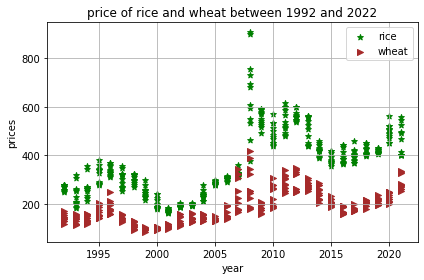

,Year,Price_wheat_ton,Price_rice_ton,Inflation_rate,Price_wheat_ton_infl,Price_rice_ton_infl
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,2006.540390,185.302869,363.930418,36.316685,241.726769,474.038384
std,8.645592,64.985279,131.508817,26.605378,65.234300,133.776144
min,1992.000000,85.300000,163.750000,-1.290000,136.220000,246.020000
25%,1999.000000,137.315000,261.250000,12.370000,193.010000,397.500000
50%,2007.000000,175.270000,343.750000,28.300000,228.310000,455.540000
75%,2014.000000,220.260000,444.500000,59.700000,275.835000,540.180000
max,2021.000000,419.610000,907.000000,89.590000,518.470000,1120.690000


In [4]:
# find only details about wheat and rice
no_corn_data = data.drop(["Price_corn_ton", "Price_corn_ton_infl"], axis=1)

# plot the prices of wheat and rice over the years
fig, axis = plt.subplots()
plt.scatter(x=no_corn_data.Year, y=no_corn_data.Price_rice_ton, color="green", marker="*", label="rice")
plt.scatter(x=no_corn_data.Year, y=no_corn_data.Price_wheat_ton, color="brown", marker=r">", label="wheat")
axis.set_xlabel("year")
axis.set_ylabel("prices")
axis.legend()
axis.grid(True)
axis.set_title("price of rice and wheat between 1992 and 2022")
fig.tight_layout()
plt.show()

no_corn_data.describe()

In [5]:
no_corn_data[["Price_wheat_ton", "Price_rice_ton", "Inflation_rate"]].corr()

no_corn_data

,Year,Month,Price_wheat_ton,Price_rice_ton,Inflation_rate,Price_wheat_ton_infl,Price_rice_ton_infl
0,1992,Feb,170.12,278.25,89.59,322.53,527.53
1,1992,Mar,161.44,277.20,89.59,306.07,525.54
2,1992,Apr,153.07,278.00,89.59,290.21,527.06
3,1992,May,139.72,274.00,89.59,264.90,519.48
4,1992,Jun,140.36,268.80,89.59,266.11,509.62
...,...,...,...,...,...,...,...
354,2021,Aug,276.18,403.00,-1.29,272.62,397.80
355,2021,Sep,263.60,400.00,-1.29,260.20,394.84
356,2021,Oct,334.50,401.00,-1.29,330.18,395.83
357,2021,Nov,327.82,400.00,-1.29,323.59,394.84


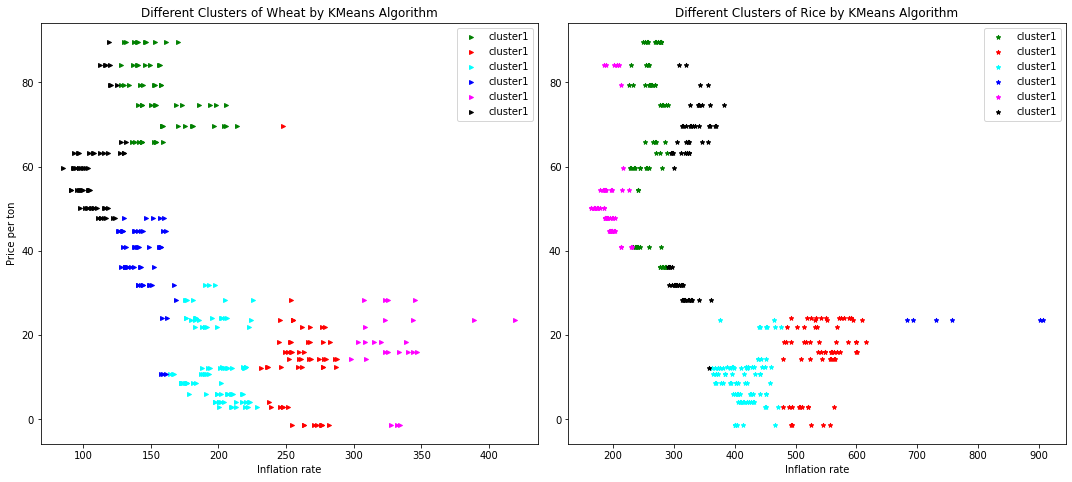

In [6]:
# define a subplot with 1 row and 2 columns
figure, axis = plt.subplots(1, 2, figsize=(15, 6.8))

km = KMeans(n_clusters=6)
predict_wheat = km.fit_predict(no_corn_data[["Price_wheat_ton", "Inflation_rate"]])
predict_rice = km.fit_predict(no_corn_data[["Price_rice_ton", "Inflation_rate"]])

# predict wheat and rice clusters
no_corn_data["wheat_clusters"] = predict_wheat
no_corn_data["rice_clusters"] = predict_rice

no_corn_data["rice_clusters"].value_counts()
no_corn_data["wheat_clusters"].value_counts()

# predicted wheat clusters
wheat_cluster0 = no_corn_data[no_corn_data["wheat_clusters"] == 0]
wheat_cluster1 = no_corn_data[no_corn_data["wheat_clusters"] == 1]
wheat_cluster2 = no_corn_data[no_corn_data["wheat_clusters"] == 2]
wheat_cluster3 = no_corn_data[no_corn_data["wheat_clusters"] == 3]
wheat_cluster4 = no_corn_data[no_corn_data["wheat_clusters"] == 4]
wheat_cluster5 = no_corn_data[no_corn_data["wheat_clusters"] == 5]

# predicted rice clusters
rice_cluster0 = no_corn_data[no_corn_data["rice_clusters"] == 0]
rice_cluster1 = no_corn_data[no_corn_data["rice_clusters"] == 1]
rice_cluster2 = no_corn_data[no_corn_data["rice_clusters"] == 2]
rice_cluster3 = no_corn_data[no_corn_data["rice_clusters"] == 3]
rice_cluster4 = no_corn_data[no_corn_data["rice_clusters"] == 4]
rice_cluster5 = no_corn_data[no_corn_data["rice_clusters"] == 5]

# plot scatter plots for wheat on axis 0
axis[0].scatter(wheat_cluster0["Price_wheat_ton"], wheat_cluster0["Inflation_rate"], color="green", s=15, label="cluster1", marker=">")
axis[0].scatter(wheat_cluster1["Price_wheat_ton"], wheat_cluster1["Inflation_rate"], color="red", s=15, label="cluster1", marker=">")
axis[0].scatter(wheat_cluster2["Price_wheat_ton"], wheat_cluster2["Inflation_rate"], color="cyan", s=15, label="cluster1", marker=">")
axis[0].scatter(wheat_cluster3["Price_wheat_ton"], wheat_cluster3["Inflation_rate"], color="blue", s=15, label="cluster1", marker=">")
axis[0].scatter(wheat_cluster4["Price_wheat_ton"], wheat_cluster4["Inflation_rate"], color="magenta", s=15, label="cluster1", marker=">")
axis[0].scatter(wheat_cluster5["Price_wheat_ton"], wheat_cluster5["Inflation_rate"], color="black", s=15, label="cluster1", marker=">")

# plot scatter plots for rice on axis 1
axis[1].scatter(rice_cluster0["Price_rice_ton"], rice_cluster0["Inflation_rate"], color="green", s=18, label="cluster1", marker="*")
axis[1].scatter(rice_cluster1["Price_rice_ton"], rice_cluster1["Inflation_rate"], color="red", s=18, label="cluster1", marker="*")
axis[1].scatter(rice_cluster2["Price_rice_ton"], rice_cluster2["Inflation_rate"], color="cyan", s=18, label="cluster1", marker="*")
axis[1].scatter(rice_cluster3["Price_rice_ton"], rice_cluster3["Inflation_rate"], color="blue", s=18, label="cluster1", marker="*")
axis[1].scatter(rice_cluster4["Price_rice_ton"], rice_cluster4["Inflation_rate"], color="magenta", s=18, label="cluster1", marker="*")
axis[1].scatter(rice_cluster5["Price_rice_ton"], rice_cluster5["Inflation_rate"], color="black", s=18, label="cluster1", marker="*")

axis[0].set_xlabel("Inflation rate")
axis[0].set_ylabel("Price per ton")
axis[1].set_xlabel("Inflation rate")

# add legends to the plots and set the titles
axis[0].legend()
axis[1].legend()
axis[0].set_title("Different Clusters of Wheat by KMeans Algorithm")
axis[1].set_title("Different Clusters of Rice by KMeans Algorithm")
figure.tight_layout()

plt.show()